In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer, word_tokenize
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, plot_confusion_matrix

In [2]:
ls

Allison's Notebook.ipynb  Meaghan's Notebook.ipynb  Raylin's Notebook.ipynb


In [3]:
ls data 

ls: data: No such file or directory


In [4]:
df = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/project_4/NLP_project/data/judge_tweet_product_company.csv', encoding='latin1')

In [5]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [6]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

Rename columns
target columns 
Do we need to do cleaning for EDA?
Precsion is important 
dropping the 'i can't tell'
drop duplicates

In [7]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].sample(10)

6530    No emotion toward brand or product
6808    No emotion toward brand or product
3596    No emotion toward brand or product
2453    No emotion toward brand or product
3883                      Positive emotion
1942    No emotion toward brand or product
2367                      Positive emotion
6802                      Positive emotion
2042                      Positive emotion
1986                      Positive emotion
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: object

In [8]:
df['is_there_an_emotion_directed_at_a_brand_or_product'][8846]

"I can't tell"

In [9]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [10]:
df.duplicated().sum()

22

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['target']= df['is_there_an_emotion_directed_at_a_brand_or_product']

In [13]:
df.drop('is_there_an_emotion_directed_at_a_brand_or_product', axis=1)

,tweet_text,emotion_in_tweet_is_directed_at,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [14]:
df['text']=df['tweet_text']

In [15]:
df.drop('tweet_text',axis=1, inplace=True)

In [16]:
df.dropna(subset=['text'], inplace=True)

In [17]:
df['length']= df['text'].str.len()

In [18]:
df.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,target,text,length
0,iPhone,Negative emotion,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,127
1,iPad or iPhone App,Positive emotion,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,139
2,iPad,Positive emotion,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,79
3,iPad or iPhone App,Negative emotion,Negative emotion,@sxsw I hope this year's festival isn't as cra...,82
4,Google,Positive emotion,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,131


In [19]:
ps = PorterStemmer()

In [20]:
df['text'][0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [21]:
#df['text'] = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        #  " ",          # Replace all non-letters with spaces
                       #   str(df['text']))

In [22]:
#tokenize = sent_tokenize(df['text'])

In [23]:
#for words in df['text']:
#    words = tokenize.word_tokenize(words)
#    for w in words:
#        print(ps.stem(w))

In [29]:
sw = stopwords.words('english')

In [30]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [111]:
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the review corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    tweet_token = TweetTokenizer()
    doc = tweet_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
  #  stemmer = PorterStemmer() 
  # doc = [stemmer.stem(word) for word in doc]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [112]:
df['tokenized'] = df['text'].apply(doc_preparer)

In [113]:
df.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,target,text,length,tokenized
0,iPhone,Negative emotion,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,127,. @wesley83 3g iphone . 3 hr tweet #rise_austi...
1,iPad or iPhone App,Positive emotion,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,139,@jessedee know @fludapp ? awesome ipad / iphon...
2,iPad,Positive emotion,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,79,@swonderlin wait #ipad 2 also . sale #sxsw .
3,iPad or iPhone App,Negative emotion,Negative emotion,@sxsw I hope this year's festival isn't as cra...,82,@sxsw hope year's festival crashy year's iphon...
4,Google,Positive emotion,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,131,@sxtxstate great stuff fri #sxsw : marissa may...


In [114]:
#pip install wordcloud

#### Word Cloud

In [115]:
# Start with one review:
text = df.text[0]


text

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [116]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)


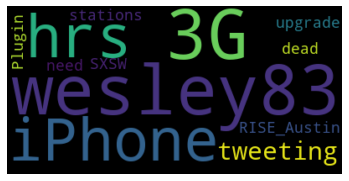

In [117]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [118]:
text1 = " ".join(review for review in df.tokenized)
print ("There are {} words in the combination of all tweets.".format(len(text1)))


There are 778160 words in the combination of all tweets.


In [119]:
stopwords = set(STOPWORDS)

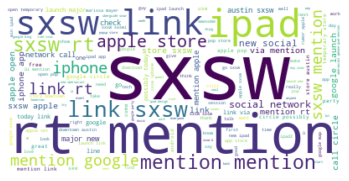

In [120]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [121]:
pos_text = df['tokenized'].loc[df['target'] == 'Positive emotion'].tolist() 
pos_text = ' '.join(pos_text).lower()

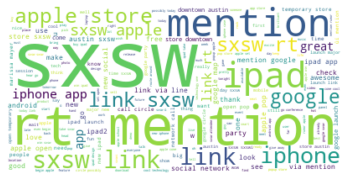

In [122]:
positive_word= WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.imshow(positive_word, interpolation='bilinear')
plt.axis("off")
plt.show()

In [123]:
#positive_word.words_

In [124]:
neg_text = df['tokenized'].loc[df['target'] == 'Negative emotion'].tolist() 
neg_text = ' '.join(neg_text).lower()

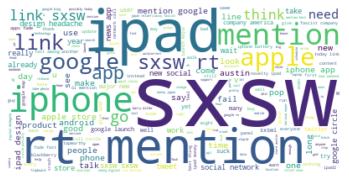

In [125]:
negative_word= WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.imshow(negative_word, interpolation='bilinear')
plt.axis("off")
plt.show()

In [126]:
neu_text = df['tokenized'].loc[df['target'] == 'No emotion toward brand or product'].tolist() 
neu_text = ' '.join(neu_text).lower()

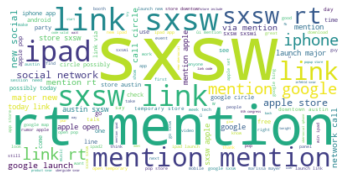

In [127]:
neutral_word= WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.imshow(neutral_word, interpolation='bilinear')
plt.axis("off")
plt.show()

In [128]:
post = list(positive_word.words_)

In [129]:
post

['sxsw',
 'rt mention',
 'mention',
 'ipad',
 'sxsw link',
 'link',
 'iphone',
 'apple store',
 'link sxsw',
 'sxsw rt',
 'google',
 'sxsw apple',
 'iphone app',
 'link rt',
 'great',
 'app',
 'mention google',
 'use',
 'store sxsw',
 'ipad2',
 'via mention',
 'go',
 'one',
 'apple open',
 'android',
 'new',
 'see',
 'love',
 'austin sxsw',
 'good',
 'check',
 'line',
 'awesome',
 'free',
 'make',
 'google map',
 'social network',
 'ipad app',
 'w',
 'party',
 'apple pop',
 'link via',
 'new social',
 'thank',
 'look',
 'u',
 'downtown austin',
 'store downtown',
 'google launch',
 'come',
 'temporary store',
 'new ipad',
 'time',
 'people',
 'want',
 'need',
 'ûï mention',
 'ipad launch',
 'marissa mayer',
 'call circle',
 'big',
 'network call',
 'know',
 'open pop',
 'launch major',
 'major new',
 'say',
 'austin',
 'nice',
 'store austin',
 'open temporary',
 'sxsw sxswi',
 'mobile',
 'cool',
 'show',
 'well',
 'wait',
 'tech',
 'first',
 'apple',
 'really',
 'google party',
 'thin

In [130]:
negt = list(negative_word.words_)

In [131]:
negt

['sxsw',
 'ipad',
 'rt mention',
 'iphone',
 'mention',
 'apple',
 'google',
 'link',
 'sxsw rt',
 'app',
 'go',
 'link sxsw',
 'think',
 'need',
 'mention google',
 'use',
 'people',
 'apple store',
 'android',
 'look',
 'iphone app',
 'line',
 'one',
 'time',
 'say',
 'day',
 'new',
 'good',
 'fail',
 'ipad design',
 'see',
 'pop',
 'long',
 'phone',
 'make',
 'come',
 'austin',
 'product',
 'talk',
 'design headache',
 'store',
 'u',
 'google circle',
 'new social',
 'tweet',
 'wait',
 'social network',
 'really',
 'work',
 'sxsw sxsw',
 'news app',
 'year',
 'already',
 'take',
 'v',
 'google launch',
 'company america',
 'many',
 'user',
 'try',
 'suck',
 'w',
 'twitter',
 'sxswi',
 'well',
 'yet',
 'major new',
 'fascist company',
 'know',
 'want',
 'guy',
 'first',
 'instead',
 'iphone battery',
 'network call',
 'call circle',
 'still',
 'hate',
 'blackberry',
 'back',
 'bad',
 'give',
 'content',
 'everyone',
 'nothing',
 'great',
 'every',
 'launch major',
 'today link',
 'pa

In [132]:
neutral_words = list(negative_word.words_)

In [133]:
neutral_words

['sxsw',
 'ipad',
 'rt mention',
 'iphone',
 'mention',
 'apple',
 'google',
 'link',
 'sxsw rt',
 'app',
 'go',
 'link sxsw',
 'think',
 'need',
 'mention google',
 'use',
 'people',
 'apple store',
 'android',
 'look',
 'iphone app',
 'line',
 'one',
 'time',
 'say',
 'day',
 'new',
 'good',
 'fail',
 'ipad design',
 'see',
 'pop',
 'long',
 'phone',
 'make',
 'come',
 'austin',
 'product',
 'talk',
 'design headache',
 'store',
 'u',
 'google circle',
 'new social',
 'tweet',
 'wait',
 'social network',
 'really',
 'work',
 'sxsw sxsw',
 'news app',
 'year',
 'already',
 'take',
 'v',
 'google launch',
 'company america',
 'many',
 'user',
 'try',
 'suck',
 'w',
 'twitter',
 'sxswi',
 'well',
 'yet',
 'major new',
 'fascist company',
 'know',
 'want',
 'guy',
 'first',
 'instead',
 'iphone battery',
 'network call',
 'call circle',
 'still',
 'hate',
 'blackberry',
 'back',
 'bad',
 'give',
 'content',
 'everyone',
 'nothing',
 'great',
 'every',
 'launch major',
 'today link',
 'pa

In [134]:
b= set(neutral_words) - set(negt)


In [135]:
bb= list(b)
bb

[]

In [94]:
new_b = ' '.join(bb).lower()
wordcloud3 = WordCloud().generate(new_b)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

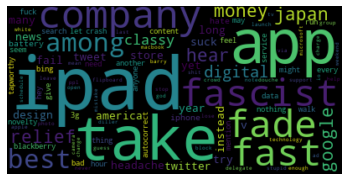

In [136]:
text_neg_list = []

for x in negt:
    if x not in post and neutral_words:
        text_neg_list.append(x)
        
        
text_neg_lists = ' '.join(text_neg_list).lower()
wordcloud5 = WordCloud().generate(text_neg_lists)

plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

In [137]:
pos_new_text = df['text'].loc[df['target'] == 'Positive emotion'].tolist() 
pos_new_text = ' '.join(pos_new_text).lower()


In [138]:
tokenizer = RegexpTokenizer(r'\w+')
new_new = tokenizer.tokenize(pos_new_text)

In [139]:
neg_new_text = df['text'].loc[df['target'] == 'Negative emotion'].tolist() 
neg_new_text = ' '.join(neg_new_text).lower()


In [140]:
tokenizer = RegexpTokenizer(r'\w+')
new_bad = tokenizer.tokenize(neg_new_text)

In [141]:
neu_new_text = df['text'].loc[df['target'] == 'Negative emotion'].tolist() 
neu_new_text = ' '.join(neu_new_text).lower()


In [142]:
tokenizer = RegexpTokenizer(r'\w+')
new_neww = tokenizer.tokenize(neg_new_text)

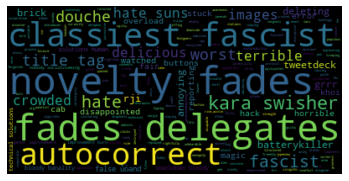

In [143]:
tt_neg_list = []

for x in new_bad:
    if x not in new_new and new_neww:
        tt_neg_list.append(x)
        
        
tt_neg_lists = ' '.join(tt_neg_list).lower()
wordcloud5 = WordCloud().generate(tt_neg_lists)

plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

In [144]:
twitter_mask = np.array(Image.open("/Users/raylinsoriano/Downloads/twitter_logo.png"))

In [145]:
twitter_mask.shape

(208, 242, 3)

In [146]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [98]:
# Transform your mask into a new one that will work with the function:
transformed_twitter_mask = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]), np.int32)

for i in range(len(twitter_mask)):
    transformed_twitter_mask[i] = list(map(transform_format, twitter_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [147]:
# Check the expected result of your mask
transformed_twitter_mask

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

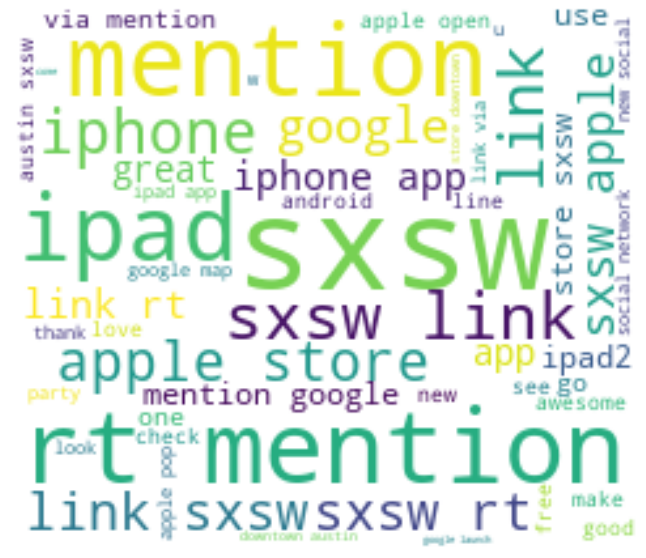

In [148]:
# Create a word cloud image
wc = WordCloud(background_color="white",max_font_size=50, max_words=50, mask=transformed_twitter_mask,
               stopwords=stopwords, contour_width=3, contour_color='blue')

# Generate a wordcloud
wc.generate(pos_text)

# store to file
wc.to_file("/Users/raylinsoriano/Downloads/twitter_logo.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [197]:
df.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,target,text,length,tokenized
0,iPhone,Negative emotion,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,127,. @wesley83 3g iphone . 3 hr tweet #rise_austi...
1,iPad or iPhone App,Positive emotion,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,139,@jessedee know @fludapp ? awesome ipad / iphon...
2,iPad,Positive emotion,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,79,@swonderlin wait #ipad 2 also . sale #sxsw .
3,iPad or iPhone App,Negative emotion,Negative emotion,@sxsw I hope this year's festival isn't as cra...,82,@sxsw hope year's festival crashy year's iphon...
4,Google,Positive emotion,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,131,@sxtxstate great stuff fri #sxsw : marissa may...


In [180]:
df.loc[498]

emotion_in_tweet_is_directed_at                                                                    iPad
is_there_an_emotion_directed_at_a_brand_or_product                                     Negative emotion
target                                                                                 Negative emotion
text                                                  I need to find a better #SXSW stream to follow...
length                                                                                              108
tokenized                                             need find good #sxsw stream follow . inane ipa...
Name: 498, dtype: object

### Train Test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(df['tokenized'], df['target'], random_state=42, stratify=df['target'])

In [150]:
X_train.shape

(6802,)

### Data Cleaning 

In [151]:
df_train = pd.concat([X_train, y_train], axis =1)


In [152]:
df_test = pd.concat([X_test, y_test], axis =1)


In [153]:
def drop_unidentified(df):
    '''
    Drop rows from DataFrame where the target is 'I can't tell'.
    '''
    df.drop(df.loc[df['target']=="I can't tell"].index, inplace=True)
    return df

In [154]:
def label(df):
    '''
    Encode values of the target to numerical data.
    '''
    df['target'] = df['target'].map({'No emotion toward brand or product': 0,
                                     'Negative emotion': 1,
                                     'Positive emotion': 2})
    return df

In [155]:
cleaning_pipeline = Pipeline(steps=[
    ('drop', FunctionTransformer(drop_unidentified)),
    ('label', FunctionTransformer(label))
])

In [156]:
df_train_clean = cleaning_pipeline.fit_transform(df_train)
df_test_clean = cleaning_pipeline.transform(df_test)

#### Logistic with stemming and lemming 

In [157]:
weights = {0: 1.0, 1: 2.0, 2: 1.5}
log_lem_pipe= imbpipe([('tifidf', TfidfVectorizer(stop_words=sw)),
                    ('log', LogisticRegression(max_iter=100000, class_weight=weights))
                     
                    ])

log_lem_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tifidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log',
                 LogisticRegression(class_weight={0: 1.0, 1: 2.0, 2: 1.5},
                                    max_iter=100000))])

In [158]:
print_cv_scores(log_lem_pipe, df_train_clean['tokenized'], df_train_clean['target'])

NameError: name 'print_cv_scores' is not defined

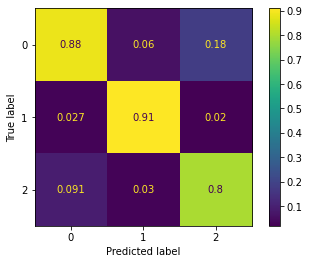

In [159]:
plot_confusion_matrix(log_lem_pipe, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

In [160]:
bayes_pipe = Pipeline([('tifidf', TfidfVectorizer(stop_words=sw)),
                    ('nb', MultinomialNB())
                     
                    ])
bayes_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tifidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [325]:
print_cv_scores(bayes_pipe,df_train_clean['tokenized'], df_train_clean['target'] )

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-pa

[0.88649963 0.88612565 0.88500374 0.88668661 0.89098728]
Training Accuracy 0.8870605833956621
##############
[0.66043381 0.64397906 0.64622289 0.66267764 0.64248317]
Cross_Val Accuracy 0.6511593118922963
##############
Training Macro Precision: 0.9012097615347828
Cross_Val Macro Precision: 0.5963882578692783
##############
Training Macro Recall: 0.8478719874792763
Cross_Val Macro Recall: 0.5045613648534482
##############
Training Macro F1: 0.8716324566915535
Cross_Val Macro F1: 0.5300633250337279


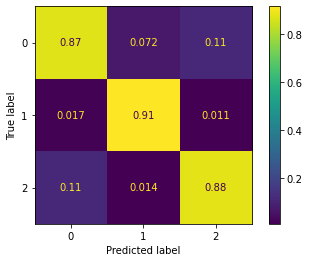

In [326]:
plot_confusion_matrix(bayes_pipe, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

#### First Model Pipline



In [197]:
sw = stopwords.words('english')

In [198]:


fsm_pipe= Pipeline([('cv', CountVectorizer(stop_words=sw)),
                    ('nb', MultinomialNB())
                     
                    ])

In [199]:
fsm_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [27]:
y_hat = fsm_pipe.predict(df_train_clean['text'])

In [28]:
accuracy_score(df_train_clean['target'], y_hat)

0.8250074783128926

In [29]:
confusion_matrix(df_train_clean['target'], y_hat)

array([[3655,   31,  346],
       [ 147,  191,   89],
       [ 554,    3, 1670]])

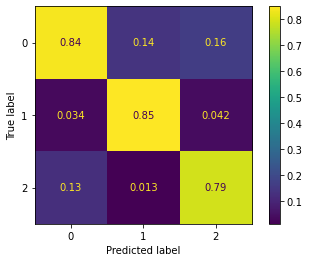

In [30]:
plot_confusion_matrix(fsm_pipe, df_train_clean['text'], df_train_clean['target'], normalize='pred')

In [161]:
final_bayes = Pipeline([('tfid', TfidfVectorizer(stop_words=sw)),
                    ('nb', MultinomialNB())
                     
                    ])

final_bayes.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [162]:
final_bayes.score(df_test_clean['tokenized'], df_test_clean['target'])

0.6594885598923284

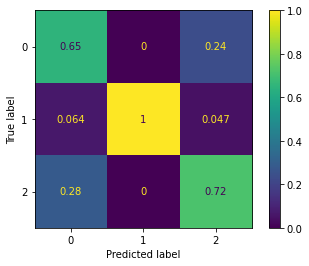

In [163]:
plot_confusion_matrix(final_bayes, df_test_clean['tokenized'], df_test_clean['target'], normalize='pred')

In [164]:
y_true= df_test_clean['tokenized']
y_pred = final_bayes.predict(df_test_clean['tokenized'])

In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred, average='macro')

TypeError: accuracy_score() got an unexpected keyword argument 'average'

In [166]:
#cross_val_score(MultinomialNB(),  df_train_clean['text'], df_train_clean['target'])

In [167]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Macro Precision:', results['train_precision_macro'].mean())
    print('Cross_Val Macro Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training Macro Recall:', results['train_recall_macro'].mean())
    print('Cross_Val Macro Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training Macro F1:', results['train_f1_macro'].mean())
    print('Cross_Val Macro F1:', results['test_f1_macro'].mean())

In [168]:
print_cv_scores(fsm_pipe, df_train_clean['text'], df_train_clean['target'])

NameError: name 'fsm_pipe' is not defined

In [169]:
sec_pipe= imbpipe([('tifid', TfidfVectorizer(stop_words=sw)),
                    ('smote', SMOTE(random_state=42)),
                    ('nb', MultinomialNB())
                     
                    ])

In [35]:
sec_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('smote', SMOTE(random_state=42)), ('nb', MultinomialNB())])

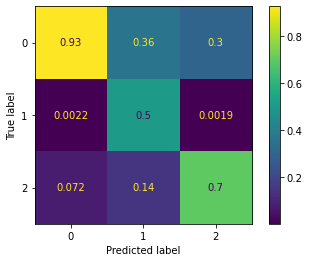

In [36]:
plot_confusion_matrix(sec_pipe, df_train_clean['text'], df_train_clean['target'], normalize='pred')

In [185]:
print_cv_scores(sec_pipe, df_train_clean['text'], df_train_clean['target'])

[0.79394166 0.80164517 0.79323238 0.79622359 0.79398018]
Training Accuracy 0.7958045968091395
##############
[0.5799701  0.59461481 0.57068063 0.57666417 0.59760658]
Cross_Val Accuracy 0.5839072595206233
##############
Training Macro Precision: 0.7220145734861586
Cross_Val Macro Precision: 0.505769334019282
##############
Training Macro Recall: 0.858773519015488
Cross_Val Macro Recall: 0.5774607393080815
##############
Training Macro F1: 0.7609760019135543
Cross_Val Macro F1: 0.5167083774129507


### Running Logistic Models

In [37]:
param = {'log__class_weight': [None, 'balanced'], 
         'log__tol': [0.0001, 0.01, 0.1]
        }

In [38]:
log_pipe= Pipeline([('cv', CountVectorizer(stop_words=sw)),
                    ('log', LogisticRegression(max_iter=100000))
                     
                    ])

log_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log', LogisticRegression(max_iter=100000))])

In [223]:
grid = GridSearchCV(log_pipe, param, scoring= 'precision_macro',cv=5)

In [202]:
grid.fit(df_train_clean['text'], df_train_clean['target'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
    

In [203]:
grid.best_estimator_

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log', LogisticRegression(max_iter=1000))])

In [204]:
grid.best_params_

{'log__class_weight': None, 'log__tol': 0.0001}

In [205]:
grid.best_score_

0.6200105211453915

In [63]:
print_cv_scores(log_pipe, df_train_clean['text'], df_train_clean['target'])

[0.92183994 0.9212937  0.9209198  0.92353711 0.92148065]
Training Accuracy 0.9218142396687293
##############
[0.67713004 0.6881077  0.68362004 0.67389678 0.67539267]
Cross_Val Accuracy 0.679629449507129
##############
Training Macro Precision: 0.9450352765352561
Cross_Val Macro Precision: 0.6200105211453915
##############
Training Macro Recall: 0.8790958617664917
Cross_Val Macro Recall: 0.5224336726940089
##############
Training Macro F1: 0.9081806986636474
Cross_Val Macro F1: 0.5479293229316939


In [627]:
final_log_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                    ('log' , LogisticRegression(max_iter=1000000,class_weight='balanced',
                                                tol= 0.1)),
                
                     
                    ])

In [629]:
final_log_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000000,
                                    tol=0.1))])

In [631]:
print_cv_scores(final_log_pipe, df_test_clean['tokenized'], df_test_clean['target'])

[0.95120583 0.95288839 0.95288839 0.95737521 0.95627803]
Training Accuracy 0.9541271701596292
##############
[0.61659193 0.59865471 0.63452915 0.65695067 0.58426966]
Cross_Val Accuracy 0.6181992240640903
##############
Training Macro Precision: 0.9354064391419386
Cross_Val Macro Precision: 0.5158626360534917
##############
Training Macro Recall: 0.9673186623657248
Cross_Val Macro Recall: 0.4977907725575075
##############
Training Macro F1: 0.9503852713685641
Cross_Val Macro F1: 0.5038638241700406


##### running logistic with smote

In [39]:
log_smote_pipe= imbpipe([('cv', CountVectorizer(stop_words=sw)),
                    ('smote', SMOTE(random_state=42)),
                    ('log', LogisticRegression(max_iter=1000))
                     
                    ])

log_smote_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('smote', SMOTE(random_state=42)),
                ('log', LogisticRegression(max_iter=1000))])

In [207]:
grid2 = GridSearchCV(log_smote_pipe, param, scoring= 'precision_macro',cv=5)

In [208]:
grid2.fit(df_train_clean['text'], df_train_clean['target'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
    

In [209]:
grid2.best_params_

{'log__class_weight': None, 'log__tol': 0.0001}

In [210]:
grid2.best_score_

0.5008482161299347

The model did worst with smoteing

In [40]:
print_cv_scores(log_smote_pipe, df_train_clean['text'], df_train_clean['target'])

[0.90052356 0.89549448 0.89605534 0.90315947 0.89661619]
Training Accuracy 0.8983698083215634
##############
[0.60762332 0.61256545 0.60957367 0.61106956 0.63051608]
Cross_Val Accuracy 0.6142696150608249
##############
Training Macro Precision: 0.8639969509739605
Cross_Val Macro Precision: 0.5008482161299347
##############
Training Macro Recall: 0.884176477266094
Cross_Val Macro Recall: 0.5288772099777101
##############
Training Macro F1: 0.8736002995230747
Cross_Val Macro F1: 0.5106749517847732


##### Adding more paramters to grid search

In [41]:
param2 = {'log__class_weight': [None, 'balanced'], 
         'log__tol': [0.0001, 0.01, 0.1],
         'log__C' : [0.0001,0.001,0.01],
         'log__penalty': ['l2','none']
        }


In [226]:
grid3 = GridSearchCV(log_pipe, param2, scoring= 'precision_macro',cv=5, verbose=2)

In [227]:
grid3.fit(df_train_clean['text'], df_train_clean['target'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  17.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  19.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  36.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  13.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=   6.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  14.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  11.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  16.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   6.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.6s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  51.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  15.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  30.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  31.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  28.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   9.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   7.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  13.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  11.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  13.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   1.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s
[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  46.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  18.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  44.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  21.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  14.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=   8.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  14.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  10.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  18.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   5.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.0s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.6s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__to

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  50.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  16.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  30.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  29.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  24.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  10.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   9.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  11.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   9.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  14.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  43.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  18.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  46.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  25.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  13.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=   6.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  16.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  10.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  16.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   2.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   6.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.1s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.7s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.5s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; to

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  59.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  21.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  28.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  23.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  23.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  10.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   8.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  11.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   8.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  12.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   4.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   2.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
    

In [228]:
grid3.best_params_

{'log__C': 0.0001,
 'log__class_weight': 'balanced',
 'log__penalty': 'none',
 'log__tol': 0.1}

In [229]:
grid3.best_score_


0.5551151136118678

In [237]:
grid4 = GridSearchCV(fouth_pipe, param2, scoring= 'precision_macro',cv=5, verbose=2)

In [248]:
grid4.fit(df_train_clean['text'], df_train_clean['target'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  20.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


KeyboardInterrupt: 

In [239]:
grid4.best_params_

{'log__C': 0.0001,
 'log__class_weight': 'balanced',
 'log__penalty': 'none',
 'log__tol': 0.1}

In [262]:
pd.DataFrame(grid4.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log__C,param_log__class_weight,param_log__penalty,param_log__tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.278504,0.038912,0.035829,0.003117,0.0001,None,l2,0.0001,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.201046,0.200947,0.200947,0.200947,0.201197,0.201017,0.000098,28
1,0.376056,0.146469,0.045577,0.011984,0.0001,None,l2,0.01,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.201046,0.200947,0.200947,0.200947,0.201197,0.201017,0.000098,28
2,0.282032,0.040177,0.037444,0.003919,0.0001,None,l2,0.1,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.201046,0.200947,0.200947,0.200947,0.201197,0.201017,0.000098,28
3,38.343950,18.081782,0.033084,0.000870,0.0001,None,none,0.0001,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.520345,0.505732,0.527085,0.577597,0.557138,0.537579,0.026097,13
4,7.028473,1.044938,0.037045,0.009136,0.0001,None,none,0.01,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.530772,0.536844,0.553306,0.569889,0.576456,0.553453,0.017830,7
5,2.380358,0.242761,0.040816,0.005315,0.0001,None,none,0.1,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.543358,0.543256,0.589236,0.567854,0.549454,0.558632,0.017752,4
6,0.283194,0.150184,0.036009,0.003202,0.0001,balanced,l2,0.0001,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.472759,0.482222,0.457642,0.475202,0.478478,0.473261,0.008432,25
7,0.227536,0.051624,0.038025,0.004254,0.0001,balanced,l2,0.01,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.472507,0.482222,0.457642,0.474634,0.478247,0.473050,0.008383,26
8,0.271059,0.131663,0.036090,0.004156,0.0001,balanced,l2,0.1,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.472507,0.482222,0.457642,0.474634,0.478247,0.473050,0.008383,26
9,39.783170,20.314403,0.032893,0.002643,0.0001,balanced,none,0.0001,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.519963,0.506747,0.508115,0.607092,0.540520,0.536487,0.037320,16


In [247]:
grid4.best_score_

0.5638306817740808

#### With Tifid

In [64]:
fouth_pipe= imbpipe([('tifid', TfidfVectorizer(stop_words=sw)),
                    ('log' , LogisticRegression(max_iter=1000000)),
                
                     
                    ])

In [240]:
print_cv_scores(fouth_pipe,df_train_clean['text'], df_train_clean['target'])

[0.81881077 0.81547953 0.8197794  0.81734904 0.81753599]
Training Accuracy 0.8177909445044076
##############
[0.66367713 0.69109948 0.67614061 0.6724009  0.69783096]
Cross_Val Accuracy 0.6802298164352962
##############
Training Macro Precision: 0.87802205964075
Cross_Val Macro Precision: 0.7032293662332516
##############
Training Macro Recall: 0.5981580318610696
Cross_Val Macro Recall: 0.4590756027318907
##############
Training Macro F1: 0.6320359439296835
Cross_Val Macro F1: 0.4667041837824696


In [ ]:
#ngram_range =(1,2)

In [258]:
fifth_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                    ('log' , LogisticRegression(max_iter=1000000, C= 0.0001,class_weight='balanced',
                                                penalty= 'none',tol= 0.1)),
                
                     
                    ])

In [260]:
fifth_pipe.fit(df_train_clean['text'], df_train_clean['target'])

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log',
                 LogisticRegression(C=0.0001, class_weight='balanced',
                                    max_iter=1000000, penalty='none',
                                    tol=0.1))])

In [261]:
print_cv_scores(fifth_pipe,df_train_clean['text'], df_train_clean['target'])

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[0.98840688 0.9882221  0.98448308 0.9878482  0.98616564]
Training Accuracy 0.9870251787953291
##############
[0.68011958 0.6776365  0.66043381 0.66566941 0.67539267]
Cross_Val Accuracy 0.6718503934807083
##############
Training Macro Precision: 0.9848671329397526
Cross_Val Macro Precision: 0.6231240361915524
##############
Training Macro Recall: 0.9919403682265129
Cross_Val Macro Recall: 0.5239971263032704
##############
Training Macro F1: 0.9883198471808358
Cross_Val Macro F1: 0.5479610817113028


In [625]:
sixth_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                    ('log' , LogisticRegression(max_iter=1000000,class_weight='balanced',
                                                tol= 0.1)),
                
                     
                    ])

In [626]:
sixth_pipe.fit(df_train_clean['text'], df_train_clean['target'])

KeyError: 'text'

In [115]:
print_cv_scores(sixth_pipe,df_train_clean['text'], df_train_clean['target'])

[0.91604338 0.91475042 0.91344176 0.91661993 0.91848944]
Training Accuracy 0.9158689864789944
##############
[0.67040359 0.67165295 0.6551982  0.65370232 0.67539267]
Cross_Val Accuracy 0.6652699471073382
##############
Training Macro Precision: 0.8833719129571953
Cross_Val Macro Precision: 0.5756767754054304
##############
Training Macro Recall: 0.9418603957551799
Cross_Val Macro Recall: 0.5793933316336125
##############
Training Macro F1: 0.9091960599181986
Cross_Val Macro F1: 0.5757783676869849


#### Trying grid search with different solvers

In [270]:
param5 = {'log__class_weight': [None, 'balanced'], 
         'log__tol': [0.0001, 0.01, 0.1],
         'log__penalty': ['none'],
         'log__solver':['newton-cg', 'sag', 'saga', 'lbfgs']
        }

In [272]:
grid5 = GridSearchCV(seventh_pipe, param3, scoring= 'precision_macro',cv=5, verbose=2)

In [ ]:
grid5.fit(df_train_clean['text'], df_train_clean['target'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  54.6s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  53.1s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time= 2.9min
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  12.4s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  16.4s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.01; total time=   5.5s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.01; total time=   5.2s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.01; total time=   6.3s
[CV] END log__class_weight=None, log__penalty=none, log_

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END log__class_weight=None, log__penalty=none, log__solver=saga, log__tol=0.0001; total time=89.0min


not worth the time.

#### Trying with an SVD Model

In [110]:
seventh_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                        ('ss', StandardScaler(with_mean=False)),
                        ('tsvd', TruncatedSVD(random_state=42)),  
                        ('log' , LogisticRegression(max_iter=1000000,class_weight='balanced',
                                                tol= 0.1)),
                
                     
                    ])

In [111]:
seventh_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('tsvd', TruncatedSVD(random_state=42)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000000,
                                    tol=0.1))])

In [112]:
print_cv_scores(seventh_pipe, df_train_clean['text'], df_train_clean['target'])

[0.35471204 0.45148626 0.33557674 0.34230697 0.33183773]
Training Accuracy 0.36318394885181843
##############
[0.38863976 0.44801795 0.37771129 0.36724009 0.35228123]
Cross_Val Accuracy 0.3867780643588875
##############
Training Macro Precision: 0.3590325644813809
Cross_Val Macro Precision: 0.3651013722876853
##############
Training Macro Recall: 0.3863150106552157
Cross_Val Macro Recall: 0.39608680543687463
##############
Training Macro F1: 0.28604701846514163
Cross_Val Macro F1: 0.30428138451969533


In [118]:
eigth_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                        ('ss', StandardScaler(with_mean=False)),
                        ('tsvd', TruncatedSVD(n_components=100, random_state=42)),  
                        ('log' , LogisticRegression(max_iter=1000000,class_weight='balanced',
                                                tol= 0.1)),
                
                     
                    ])

eigth_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('tsvd', TruncatedSVD(n_components=100, random_state=42)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000000,
                                    tol=0.1))])

In [119]:
print_cv_scores(seventh_pipe, df_train_clean['text'], df_train_clean['target'])

[0.35471204 0.45148626 0.33557674 0.34230697 0.33183773]
Training Accuracy 0.36318394885181843
##############
[0.38863976 0.44801795 0.37771129 0.36724009 0.35228123]
Cross_Val Accuracy 0.3867780643588875
##############
Training Macro Precision: 0.3590325644813809
Cross_Val Macro Precision: 0.3651013722876853
##############
Training Macro Recall: 0.3863150106552157
Cross_Val Macro Recall: 0.39608680543687463
##############
Training Macro F1: 0.28604701846514163
Cross_Val Macro F1: 0.30428138451969533
